In [1]:
using DataFrames, Optim, Revise, Serialization, DebuggingUtilities

In [2]:
string(@__DIR__) in LOAD_PATH || push!(LOAD_PATH, @__DIR__);
using BLPmodule; const m = BLPmodule;

In [3]:
# df = deserialize("jls/df.jls");
pars = deserialize("jls/pars.jls");
ec = deserialize("jls/ec.jls");

---

In [4]:
# linear characteristics (staffing variables):
X1 = vcat(transpose.([ec.firms[i].X for i in eachindex(ec.firms)])...)
Z = X1;

In [5]:
# gmm
ec = deserialize("jls/ec.jls");
pars = deserialize("jls/pars.jls");
obj_test = m.gmm_lm([10.,10.], ec, pars, X1);
println(obj_test)


661.9801001475862


In [6]:
pts = []
for theta21 in range(-2., 2., step = 0.2)
    for theta22 in range(-2., 2., step = 0.2)
        θ2 = [theta21,theta22]
        push!(pts, (theta21, theta22, m.gmm_lm(θ2, ec, pars, X1)))
    end
end


In [8]:
using Plots

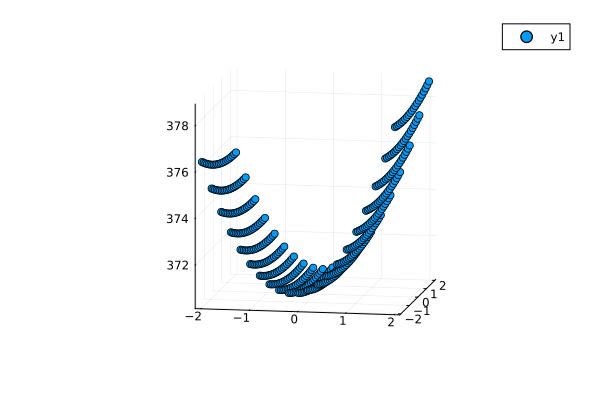

In [40]:
plt = scatter([p[1] for p in pts], [p[2] for p in pts], [p[3] for p in pts], camera = (10,10,50))

In [42]:
findmin(z)

(370.3739615145249, 204)

In [44]:
pts[findmin(z)[2]]

3-element Vector{Float64}:
  -0.2
   0.8
 370.3739615145249

---

In [8]:
# analytic gradient
m.gmm_grad([1.,1.], ec, pars, X1)


(ec.tracts[1]).shares = [0.005185850359729921; 0.0061529538487200405; 0.010499180959956072; 0.016717653469476602; 0.010914184236750429]
(in /mnt/staff/zhli/blp-quantities/BLPmodule/gmm.jl:33)
0.005185850359729921
grad = 

[38069.66746797896, 2174.0861889127186]


2-element Vector{Float64}:
 38069.66746797896
  2174.0861889127186

In [12]:
# finite diff
m.grad_diff([-0.2,0.9], ec, pars, X1)

2-element Vector{Float64}:
 -0.004565282551993732
  0.011868564797623547

---

In [1]:
function g!(storage::Array, θ2::Array)
    storage .= m.gmm_grad(θ2, ec, pars, X1)
    return nothing
end

g! (generic function with 1 method)

In [ ]:
# closure 
function closure_gmm(θ2)
    return m.gmm_lm(θ2, ec, pars, X1)
end

In [15]:
# optim with analytic gradient
initial_θ2 = [1.,2.]
pars = deserialize("jls/pars.jls");
ec = deserialize("jls/ec.jls");
res = optimize(θ2 -> m.gmm_lm(θ2, ec, pars, X1), g!, initial_θ2, LBFGS())


(ec.tracts[1]).shares = [1.0; 1.0]
(in /users/facsupport/zhli/blp-quantities/BLPmodule/gmm.jl:32)
1.0
grad = 

[-1.0591817693673309, 0.009508595725479364]


 * Status: failure

 * Candidate solution
    Final objective value:     4.050715e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1


In [7]:
# optim with autodiff
initial_θ2 = [1.,1.]
pars = deserialize("jls/pars.jls");
ec = deserialize("jls/ec.jls");
res = optimize(θ2 -> m.gmm_lm(θ2, ec, pars, X1), initial_θ2, LBFGS(); autodiff = :forward)


(ec.tracts[1]).shares = [1.0; 1.0]
(in /users/facsupport/zhli/blp-quantities/BLPmodule/gmm.jl:14)


MethodError: MethodError: no method matching Float64(::ForwardDiff.Dual{ForwardDiff.Tag{var"#13#14", Float64}, Float64, 2})
Closest candidates are:
  (::Type{T})(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:200
  (::Type{T})(::T) where T<:Number at boot.jl:760
  (::Type{T})(!Matched::AbstractChar) where T<:Union{AbstractChar, Number} at char.jl:50
  ...

In [12]:
# optim with finite diff
initial_θ2 = [1.,1.]
pars = deserialize("jls/pars.jls");
ec = deserialize("jls/ec.jls");
res = optimize(θ2 -> m.gmm_lm(θ2, ec, pars, X1), initial_θ2, LBFGS())


AssertionError: AssertionError: B > A

---

In [8]:
res = deserialize("jls/res.jls")

 * Status: failure

 * Candidate solution
    Final objective value:     NaN

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1


In [12]:
# one dimensional first

---